**Importing neccessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Unzip files (dataset)**

In [3]:
!unzip '/content/Dataset.zip'

Archive:  /content/Dataset.zip
   creating: dataset/
  inflating: dataset/user.csv        
  inflating: dataset/relationship.csv  
  inflating: dataset/content.csv     
  inflating: dataset/test.csv        
  inflating: dataset/sample_submission.json  


In [4]:
! pip install geocoder

     |████████████████████████████████| 98 kB 4.5 MB/s 


**Reading content dataset**

In [5]:
content = pd.read_csv("/content/dataset/content.csv")
content.head(5)

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10


In [6]:
content = content.drop('release_date',axis = 'columns') # dropping column release_date
content.head(5)

,content_id,content_type,language,genre,duration,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2,29,10


**One hot encoding content dataset for categorical columns('content_type','language','genre')**

In [7]:
one_hot_encoded_content = pd.get_dummies(content, columns = ['content_type','language','genre'])
one_hot_encoded_content.head(5)

,content_id,duration,rating,episode_count,season_count,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
0,cont_475_19_32,4980000,10,32,19,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cont_2185_15_21,3000000,4,21,15,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cont_4857_13_28,3120000,8,28,13,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,cont_3340_1_5,9900000,0,5,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,cont_1664_10_29,3660000,2,29,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**normalising content dataset for numerical columns('season_count','episode_count','duration')**

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(one_hot_encoded_content[['season_count','episode_count','duration']])

one_hot_encoded_content[['season_count','episode_count','duration']] = scaler.transform(one_hot_encoded_content[['season_count','episode_count','duration']])

one_hot_encoded_content.head(5)

,content_id,duration,rating,episode_count,season_count,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
0,cont_475_19_32,1.594423,10,1.237638,2.013769,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cont_2185_15_21,-0.578032,4,0.375083,1.363482,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,cont_3340_1_5,6.992643,0,-0.879542,-0.912520,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,cont_1664_10_29,0.146120,2,1.002396,0.550625,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
one_hot_encoded_content = one_hot_encoded_content.set_index('content_id') #indexing content datset with content_id as index
one_hot_encoded_content.head(5)

,duration,rating,episode_count,season_count,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,language_english,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
content_id,,,,,,,,,,,,,,,,,,,,,
cont_475_19_32,1.594423,10,1.237638,2.013769,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
cont_2185_15_21,-0.578032,4,0.375083,1.363482,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cont_3340_1_5,6.992643,0,-0.879542,-0.912520,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cont_1664_10_29,0.146120,2,1.002396,0.550625,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
len(one_hot_encoded_content.index) # number of contents

48645

**Reading relationship csv file**

In [11]:
relationship = pd.read_csv("/content/dataset/relationship.csv")
relationship.head(5)

,user_id,content_id,duration,date,start_time,end_time
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,06:19:13,06:51:13
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,19:58:14,20:16:14
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,01:52:51,01:55:51
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,06:34:14,06:58:14
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,16:57:19,17:13:19


In [12]:
relationship = relationship[['user_id','content_id']] # taking only required columns
relationship.head(5)

,user_id,content_id
0,user_44902@domain.com,cont_1718_16_7
1,user_87018@domain.com,cont_825_1_3
2,user_53430@domain.com,cont_1981_2_26
3,user_53696@domain.com,cont_1072_18_7
4,user_80251@domain.com,cont_760_9_27


**Reading users csv file which contains users' details**

In [13]:
user = pd.read_csv('/content/dataset/user.csv')
user.head(5)

,user_id,user_age,gender,location,joining_date
0,user_45028@domain.com,40,M,Goa,2018-06-18
1,user_95235@domain.com,55,F,Andhra Pradesh,2019-09-17
2,user_44289@domain.com,38,F,Goa,2018-09-03
3,user_23708@domain.com,47,F,West Bengal,2020-11-15
4,user_40584@domain.com,24,M,Tamil Nadu,2018-02-06


**Scaling data for user age column in user dataset**

In [14]:
scaler = preprocessing.StandardScaler()
scaler.fit(user[['user_age']])

user[['user_age']] = scaler.transform(user[['user_age']])

user.head(5)

,user_id,user_age,gender,location,joining_date
0,user_45028@domain.com,0.155101,M,Goa,2018-06-18
1,user_95235@domain.com,1.312714,F,Andhra Pradesh,2019-09-17
2,user_44289@domain.com,0.000753,F,Goa,2018-09-03
3,user_23708@domain.com,0.695320,F,West Bengal,2020-11-15
4,user_40584@domain.com,-1.079686,M,Tamil Nadu,2018-02-06


**One hot encoding user dataset for categorical columns('gender')**

In [15]:
one_hot_encoded_user = pd.get_dummies(user, columns = ['gender'])
one_hot_encoded_user.head(5)

,user_id,user_age,location,joining_date,gender_F,gender_M
0,user_45028@domain.com,0.155101,Goa,2018-06-18,0,1
1,user_95235@domain.com,1.312714,Andhra Pradesh,2019-09-17,1,0
2,user_44289@domain.com,0.000753,Goa,2018-09-03,1,0
3,user_23708@domain.com,0.695320,West Bengal,2020-11-15,1,0
4,user_40584@domain.com,-1.079686,Tamil Nadu,2018-02-06,0,1


In [16]:
locations = one_hot_encoded_user['location'].unique()
locations

array(['Goa', 'Andhra Pradesh', 'West Bengal', 'Tamil Nadu', 'Gujarat',
       'Karnataka', 'Uttar Pradesh', 'Maharashtra', 'Telangana', 'Punjab',
       'Tripura', 'Assam', 'Haryana', 'Odisa', 'Jharkhand', 'Delhi',
       'Madhya Pradesh', 'Himachal Pradesh', 'Kerala', 'Bihar',
       'Arunachal Pradesh', 'Nagaland', 'Sikkim', 'Meghalaya',
       'Rajasthan', 'Chhattisgarh', 'Uttarakhand', 'Mizoram', 'Manipur'],
      dtype=object)

**Extracting latitude and longitude for each of the locations and storing it in dictionary**

In [17]:
geolocator = Nominatim(user_agent="MyApp")
location_coordinates = {}
for location in locations:
  location_coordinates[location] = geolocator.geocode(location)
location_coordinates['Andhra Pradesh']

Location(Andhra Pradesh, India, (15.9240905, 80.1863809, 0.0))

In [18]:
def lat(location):
  return location_coordinates[location].latitude  #retrieving only latitude value from location object
  

In [19]:
def long(location):
  return location_coordinates[location].longitude #retrieving only longitude value from location object

**Creating new column as latitude and populating with latitudes of that respective location**

In [20]:
one_hot_encoded_user['latitude'] = one_hot_encoded_user['location'].apply(lat)
one_hot_encoded_user['latitude'] 

0        15.350319
1        15.924091
2        15.350319
3        22.996495
4        10.909433
           ...    
13838    23.657762
13839    54.010193
13840    23.214617
13841    10.352874
13842    29.000000
Name: latitude, Length: 13843, dtype: float64

**Creating new column as longitude and populating with longitudes of that respective location**

In [21]:
one_hot_encoded_user['longitude'] = one_hot_encoded_user['location'].apply(long)
one_hot_encoded_user['longitude'] 

0         74.101782
1         80.186381
2         74.101782
3         87.685588
4         78.366535
            ...    
13838     85.169105
13839    102.961118
13840     92.868761
13841     76.512040
13842     76.000000
Name: longitude, Length: 13843, dtype: float64

**Scaling latitude and longitude columns**

In [22]:
scaler = preprocessing.StandardScaler()
scaler.fit(one_hot_encoded_user[['latitude','longitude']])

one_hot_encoded_user[['latitude','longitude']] = scaler.transform(one_hot_encoded_user[['latitude','longitude']])

one_hot_encoded_user.head(5)

,user_id,user_age,location,joining_date,gender_F,gender_M,latitude,longitude
0,user_45028@domain.com,0.155101,Goa,2018-06-18,0,1,-0.915619,-0.867012
1,user_95235@domain.com,1.312714,Andhra Pradesh,2019-09-17,1,0,-0.840861,0.132966
2,user_44289@domain.com,0.000753,Goa,2018-09-03,1,0,-0.915619,-0.867012
3,user_23708@domain.com,0.695320,West Bengal,2020-11-15,1,0,0.080610,1.365428
4,user_40584@domain.com,-1.079686,Tamil Nadu,2018-02-06,0,1,-1.494227,-0.166118


In [23]:
one_hot_encoded_user = one_hot_encoded_user.drop('location',axis ='columns')  # dropping location columns as we have latitutde and longitude columns now
one_hot_encoded_user.head(5)

,user_id,user_age,joining_date,gender_F,gender_M,latitude,longitude
0,user_45028@domain.com,0.155101,2018-06-18,0,1,-0.915619,-0.867012
1,user_95235@domain.com,1.312714,2019-09-17,1,0,-0.840861,0.132966
2,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012
3,user_23708@domain.com,0.695320,2020-11-15,1,0,0.080610,1.365428
4,user_40584@domain.com,-1.079686,2018-02-06,0,1,-1.494227,-0.166118


**Making user_id as index** 

In [24]:
one_hot_encoded_user = one_hot_encoded_user.set_index('user_id')
one_hot_encoded_user.head(5)

,user_age,joining_date,gender_F,gender_M,latitude,longitude
user_id,,,,,,
user_45028@domain.com,0.155101,2018-06-18,0,1,-0.915619,-0.867012
user_95235@domain.com,1.312714,2019-09-17,1,0,-0.840861,0.132966
user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012
user_23708@domain.com,0.695320,2020-11-15,1,0,0.080610,1.365428
user_40584@domain.com,-1.079686,2018-02-06,0,1,-1.494227,-0.166118


In [25]:
len(one_hot_encoded_user.index)

13843

**Merging content and relatonship tables on column 'content_id' using left outer join**

In [26]:
# here left outer join is done to include all content_ids in the resulting table 
content_relation =pd.merge(one_hot_encoded_content,relationship,on='content_id',how='left')
content_relation.shape

(1658872, 43)

In [27]:
#resulting table may include nan values after left join so it is better fill the null values with 0
content_relation = content_relation.fillna(0) # fill null values with 0
content_relation.head()

,content_id,duration,rating,episode_count,season_count,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,...,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller,user_id
0,cont_475_19_32,1.594423,10,1.237638,2.013769,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cont_2185_15_21,-0.578032,4,0.375083,1.363482,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,user_916@domain.com
3,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,user_64261@domain.com
4,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,user_95316@domain.com


**As we can see in above table outer join results in multiple users having same rating on same content_ids which is not suitable for training,thus I am making inner join as shown below which will eliminate such entries**

In [28]:
content_relation_inner =pd.merge(one_hot_encoded_content,relationship,on='content_id',how='inner')
content_relation_inner.shape

(1654450, 43)

In [29]:
content_relation_inner.head(5)

,content_id,duration,rating,episode_count,season_count,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,...,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller,user_id
0,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,user_916@domain.com
1,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,user_64261@domain.com
2,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,user_95316@domain.com
3,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,user_5475@domain.com
4,cont_4857_13_28,-0.446368,8,0.923982,1.038339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,user_63653@domain.com


**Merging content_relation and user on column 'user_id'**

In [30]:
user_relation_content = pd.merge(one_hot_encoded_user,content_relation,on='user_id',how='left')
user_relation_content.head(5)

,user_id,user_age,joining_date,gender_F,gender_M,latitude,longitude,content_id,duration,rating,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
0,user_45028@domain.com,0.155101,2018-06-18,0,1,-0.915619,-0.867012,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,user_95235@domain.com,1.312714,2019-09-17,1,0,-0.840861,0.132966,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4084_3_1,1.857751,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4499_2_7,-0.051376,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_2934_1_1,0.738608,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
user_relation_content.shape

(1657370, 49)

In [32]:
user_relation_content = user_relation_content.fillna(0) # fill Null values with 0
user_relation_content.head(5)

,user_id,user_age,joining_date,gender_F,gender_M,latitude,longitude,content_id,duration,rating,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
0,user_45028@domain.com,0.155101,2018-06-18,0,1,-0.915619,-0.867012,0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,user_95235@domain.com,1.312714,2019-09-17,1,0,-0.840861,0.132966,0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4084_3_1,1.857751,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4499_2_7,-0.051376,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_2934_1_1,0.738608,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
user_relation_content_inner = pd.merge(one_hot_encoded_user,content_relation_inner,on='user_id',how='inner')
user_relation_content_inner.head(5)

,user_id,user_age,joining_date,gender_F,gender_M,latitude,longitude,content_id,duration,rating,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
0,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4084_3_1,1.857751,8,...,0,0,0,0,0,0,0,0,0,0
1,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4499_2_7,-0.051376,3,...,0,0,0,0,0,0,0,0,0,0
2,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_2934_1_1,0.738608,0,...,0,0,0,0,0,0,0,0,0,0
3,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_1873_11_22,-0.183040,3,...,0,0,0,0,0,0,0,0,0,0
4,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4375_4_4,-0.380536,4,...,0,0,0,0,0,0,0,0,0,0


In [34]:
user_relation_content_inner.shape

(1654450, 49)

**multiple Indexing table user_relation_content on two columns 'user_id','content_id'**

In [35]:
index_data = user_relation_content.set_index(['user_id','content_id'])
index_data

user_age joining_date  gender_F  \
user_id               content_id                                         
user_45028@domain.com 0                0.155101   2018-06-18         0   
user_95235@domain.com 0                1.312714   2019-09-17         1   
user_44289@domain.com cont_4084_3_1    0.000753   2018-09-03         1   
                      cont_4499_2_7    0.000753   2018-09-03         1   
                      cont_2934_1_1    0.000753   2018-09-03         1   
...                                         ...          ...       ...   
user_19335@domain.com cont_3349_20_7  -1.465557   2020-07-13         0   
                      cont_2338_12_23 -1.465557   2020-07-13         0   
                      cont_2508_1_2   -1.465557   2020-07-13         0   
                      cont_1395_3_52  -1.465557   2020-07-13         0   
                      cont_4246_10_27 -1.465557   2020-07-13         0   

                                       gender_M  latitude  longitude  \
user_id               content_id                                       
user_45028@domain.com 0                       1 -0.915619  -0.867012   
user_95235@domain.com 0                       0 -0.840861   0.132966   
user_44289@domain.com cont_4084_3_1           0 -0.915619  -0.867012   
                      cont_4499_2_7           0 -0.915619  -0.867012   
                      cont_2934_1_1           0 -0.915619  -0.867012   
...                                         ...       ...        ...   
user_19335@domain.com cont_3349_20_7          1  0.862814  -0.555048   
                      cont_2338_12_23         1  0.862814  -0.555048   
                      cont_2508_1_2           1  0.862814  -0.555048   
                      cont_1395_3_52          1  0.862814  -0.555048   
                      cont_4246_10_27         1  0.862814  -0.555048   

                                       duration  rating  episode_count  \
user_id               content_id                                         
user_45028@domain.com 0                0.000000     0.0       0.000000   
user_95235@domain.com 0                0.000000     0.0       0.000000   
user_44289@domain.com cont_4084_3_1    1.857751     8.0      -1.193198   
                      cont_4499_2_7   -0.051376     3.0      -0.722713   
                      cont_2934_1_1    0.738608     0.0      -1.193198   
...                                         ...     ...            ...   
user_19335@domain.com cont_3349_20_7   0.343616     5.0      -0.722713   
                      cont_2338_12_23  1.067767     1.0       0.531912   
                      cont_2508_1_2    0.804440     0.0      -1.114784   
                      cont_1395_3_52  -0.578032     1.0       2.805919   
                      cont_4246_10_27 -0.314704     2.0       0.845568   

                                       season_count  ...  genre_fantasy  \
user_id               content_id                     ...                  
user_45028@domain.com 0                    0.000000  ...            0.0   
user_95235@domain.com 0                    0.000000  ...            0.0   
user_44289@domain.com cont_4084_3_1       -0.587377  ...            0.0   
                      cont_4499_2_7       -0.749948  ...            0.0   
                      cont_2934_1_1       -0.912520  ...            0.0   
...                                             ...  ...            ...   
user_19335@domain.com cont_3349_20_7       2.176340  ...            0.0   
                      cont_2338_12_23      0.875768  ...            0.0   
                      cont_2508_1_2       -0.912520  ...            0.0   
                      cont_1395_3_52      -0.587377  ...            0.0   
                      cont_4246_10_27      0.550625  ...            0.0   

                                       genre_football  genre_hockey  \
user_id               content_id                                      
user_45028@domain.com 0                           0.0     

In [36]:
index_data.loc['user_19335@domain.com'].index

Index(['cont_4662_1_25', 'cont_2707_3_21', 'cont_3811_1_1', 'cont_1935_1_12',
       'cont_2837_5_41', 'cont_1942_11_41', 'cont_1991_1_11', 'cont_3189_21_2',
       'cont_2922_7_9', 'cont_3349_20_7', 'cont_2338_12_23', 'cont_2508_1_2',
       'cont_1395_3_52', 'cont_4246_10_27'],
      dtype='object', name='content_id')

**Extracting only those users who have viewed more than 100 contents**

In [37]:
x = user_relation_content_inner['user_id'].value_counts() > 100 # Extracting only those users who have viewed more than 100 contents
y = x[x].index  #user_ids
filtered_user_relation_content = user_relation_content_inner[user_relation_content_inner['user_id'].isin(y)]

In [38]:
filtered_user_relation_content

,user_id,user_age,joining_date,gender_F,gender_M,latitude,longitude,content_id,duration,rating,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
0,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4084_3_1,1.857751,8,...,0,0,0,0,0,0,0,0,0,0
1,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4499_2_7,-0.051376,3,...,0,0,0,0,0,0,0,0,0,0
2,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_2934_1_1,0.738608,0,...,0,0,0,0,0,0,0,0,0,0
3,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_1873_11_22,-0.183040,3,...,0,0,0,0,0,0,0,0,0,0
4,user_44289@domain.com,0.000753,2018-09-03,1,0,-0.915619,-0.867012,cont_4375_4_4,-0.380536,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654393,user_58718@domain.com,-1.465557,2019-09-01,1,0,0.109029,2.217260,cont_3974_8_24,1.199431,3,...,0,0,0,0,0,0,0,0,0,0
1654394,user_58718@domain.com,-1.465557,2019-09-01,1,0,0.109029,2.217260,cont_1424_9_4,-0.183040,10,...,0,0,0,0,0,0,0,0,0,0
1654395,user_58718@domain.com,-1.465557,2019-09-01,1,0,0.109029,2.217260,cont_4900_5_8,-0.512200,7,...,0,0,0,0,0,0,0,0,0,0
1654396,user_58718@domain.com,-1.465557,2019-09-01,1,0,0.109029,2.217260,cont_2456_4_9,-0.117208,7,...,0,0,0,0,0,0,0,0,0,0


In [39]:
len(filtered_user_relation_content['content_id'].unique())

44223

**Extracting only those content_ids which have been rated for more than 100 times**

In [40]:
number_rating = filtered_user_relation_content.groupby('content_id')['rating'].count().reset_index()
number_rating.rename(columns= {'rating':'number_of_ratings'}, inplace=True)
number_rating[number_rating["number_of_ratings"] > 100]

,content_id,number_of_ratings
1705,cont_1158_10_3,124
1706,cont_1158_10_4,104
1707,cont_1158_11_3,130
1708,cont_1158_12_2,135
1709,cont_1158_12_6,125
...,...,...
42794,cont_81_7_8,146
42795,cont_81_9_1,129
42796,cont_81_9_4,138
44061,cont_975_1_1,132


**merging or joining tables user_relation_content and number_rating to get only those those content_ids which have been rated for more than 100 times**

In [41]:
finalised_dataset=user_relation_content_inner.merge(number_rating, on='content_id',how='inner')
finalised_dataset.shape

(1654450, 50)

In [42]:
finalised_dataset.columns

Index(['user_id', 'user_age', 'joining_date', 'gender_F', 'gender_M',
       'latitude', 'longitude', 'content_id', 'duration', 'rating',
       'episode_count', 'season_count', 'content_type_movies',
       'content_type_series', 'content_type_sports', 'content_type_teasers',
       'language_bengali', 'language_english', 'language_gujarati',
       'language_hindi', 'language_kannada', 'language_malayalam',
       'language_marathi', 'language_oriya', 'language_punjabi',
       'language_tamil', 'language_telugu', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_badminton', 'genre_basketball',
       'genre_biography', 'genre_comedy', 'genre_cricket', 'genre_crime',
       'genre_documentary', 'genre_drama', 'genre_family', 'genre_fantasy',
       'genre_football', 'genre_hockey', 'genre_horror', 'genre_musical',
       'genre_mystery', 'genre_sci-fi', 'genre_sport', 'genre_tennis',
       'genre_thriller', 'number_of_ratings'],
      dtype='object')

**Considering only those columns required for training**

In [43]:
X = np.array(finalised_dataset[['user_age','gender_F','gender_M','latitude','longitude','duration','episode_count','season_count','content_type_movies', 'content_type_series', 'content_type_sports',
       'content_type_teasers', 'language_bengali', 'language_english',
       'language_gujarati', 'language_hindi', 'language_kannada',
       'language_malayalam', 'language_marathi', 'language_oriya',
       'language_punjabi', 'language_tamil', 'language_telugu', 'genre_action',
       'genre_adventure', 'genre_animation', 'genre_badminton',
       'genre_basketball', 'genre_biography', 'genre_comedy', 'genre_cricket',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_football', 'genre_hockey', 'genre_horror',
       'genre_musical', 'genre_mystery', 'genre_sci-fi', 'genre_sport',
       'genre_tennis', 'genre_thriller']]) # train variables
y = finalised_dataset['rating']  # target variable

**Split Dataset into train,validation and test data**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv,y_train,y_cv = train_test_split(X_train,y_train, test_size=0.33, stratify=y_train)

In [45]:
import matplotlib.pyplot as plt

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
#define your own mse and set greater_is_better=False
mse = make_scorer(mean_squared_error,greater_is_better=True)

**Decision tree regressor model with mean squared error as metric**

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.802746      0.001459         0.021259        0.000561   
1       3.172246      0.184074         0.027521        0.000905   
2       4.344351      0.179346         0.044605        0.002123   
3       4.880300      0.190569         0.065322        0.001797   
4       5.012154      0.276373         0.072523        0.001206   
5       5.028369      0.242264         0.074158        0.002480   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               5   {'max_depth': 5}           7.300350           7.332089   
1              10  {'max_depth': 10}           6.454339           6.487502   
2              20  {'max_depth': 20}           4.365345           4.450305   
3              30  {'max_depth': 30}           2.110167           2.187675   
4              50  {'max_depth': 50}           1.557062           1.550022   
5              75  {'max_depth': 75}           1.566242       

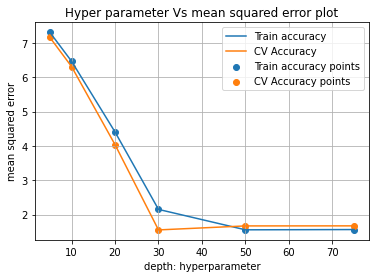

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# creating a RF classifier
#model = RandomForestClassifier(n_estimators = 100)
#model = LogisticRegression()
model = DecisionTreeRegressor()
parameters = {'max_depth':[5,10,20,30,50,75]}
clf = GridSearchCV(model, parameters, cv=3, scoring=mse)
clf.fit(X_train,y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
print(results)
results = results.sort_values(['param_max_depth'])


train_auc= (results['split0_test_score'] + results['split1_test_score'])/2
train_auc_std= results['mean_test_score']
cv_auc = results['split2_test_score'] 
cv_auc_std= results['std_test_score']
max_depth =  results['param_max_depth']


plt.plot(max_depth, train_auc, label='Train accuracy')
plt.plot(max_depth, cv_auc, label='CV Accuracy')


plt.scatter(sorted(max_depth), train_auc, label='Train accuracy points')
plt.scatter(sorted(max_depth), cv_auc, label='CV Accuracy points')

plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("mean squared error")
plt.title("Hyper parameter Vs mean squared error plot")
plt.grid()

**Train Decision tree model with optimal depth 30 with mean squared error as metric**

In [50]:
DT_regressor = DecisionTreeRegressor(max_depth = 30)
DT_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=30)

In [51]:
y_predict = DT_regressor.predict(X_test)

In [52]:
mean_squared_error(y_test,y_predict)

1.984602879988841

In [53]:
y_pred_cv = DT_regressor.predict(X_cv)
mean_squared_error(y_cv,y_pred_cv)

1.9921984571495217

**Decision tree regressor model with mean squared error as metric**

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     113.618958      0.498767         0.652484        0.008471   
1     192.809428      0.858971         1.258503        0.022221   
2     274.648610      1.303572         3.010462        0.034392   
3     313.151329      1.940539         5.007050        0.020802   
4     321.458331      2.997795         6.087145        0.073554   
5     321.175706      3.115595         6.287978        0.044773   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               5   {'max_depth': 5}           7.172279           7.162131   
1              10  {'max_depth': 10}           6.222391           6.211888   
2              20  {'max_depth': 20}           3.851192           3.756908   
3              30  {'max_depth': 30}           1.317778           1.307016   
4              50  {'max_depth': 50}           0.988454           0.992046   
5              75  {'max_depth': 75}           0.985472       

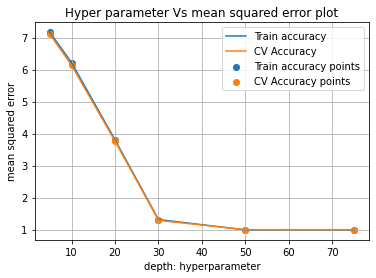

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# creating a RF classifier
#model = RandomForestClassifier(n_estimators = 100)
#model = LogisticRegression()
model = RandomForestRegressor()
parameters = {'max_depth':[5,10,20,30,50,75]}
clf = GridSearchCV(model, parameters, cv=3, scoring=mse)
clf.fit(X_train,y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
print(results)
results = results.sort_values(['param_max_depth'])


train_auc= (results['split0_test_score'] + results['split1_test_score'])/2
train_auc_std= results['mean_test_score']
cv_auc = results['split2_test_score'] 
cv_auc_std= results['std_test_score']
depth =  results['param_max_depth']


plt.plot(depth, train_auc, label='Train accuracy')
plt.plot(depth, cv_auc, label='CV Accuracy')


plt.scatter(sorted(depth), train_auc, label='Train accuracy points')
plt.scatter(sorted(depth), cv_auc, label='CV Accuracy points')

plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("mean squared error")
plt.title("Hyper parameter Vs mean squared error plot")
plt.grid()

In [58]:
RF_regressor = RandomForestRegressor(max_depth = 30)
RF_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=30)

In [59]:
y_predict = RF_regressor.predict(X_test)

In [61]:
from sklearn.metrics import r2_score
mean_squared_error(y_test,y_predict)

1.1484386842616152

In [60]:
test = pd.read_csv("/content/dataset/test.csv")
test.head(5)

,user_id
0,user_18085@domain.com
1,user_16044@domain.com
2,user_13110@domain.com
3,user_18909@domain.com
4,user_15509@domain.com


In [62]:
content_columns = ['duration','episode_count', 'season_count','content_type_movies', 'content_type_series', 'content_type_sports',
       'content_type_teasers', 'language_bengali', 'language_english',
       'language_gujarati', 'language_hindi', 'language_kannada',
       'language_malayalam', 'language_marathi', 'language_oriya',
       'language_punjabi', 'language_tamil', 'language_telugu', 'genre_action',
       'genre_adventure', 'genre_animation', 'genre_badminton',
       'genre_basketball', 'genre_biography', 'genre_comedy', 'genre_cricket',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_football', 'genre_hockey', 'genre_horror',
       'genre_musical', 'genre_mystery', 'genre_sci-fi', 'genre_sport',
       'genre_tennis', 'genre_thriller']

**Top 10 recommendations for users in test data using Decision tree regressor model**

In [63]:
user_id_content_id = {}
for user_id in test['user_id'].values: #iterating through all user ids in test datset
  user_vector = np.array(one_hot_encoded_user.loc[user_id][['user_age','gender_F','gender_M','latitude','longitude']])
  content_ratings = {}
  content_ids = list(set(one_hot_encoded_content.index.values) - set(index_data.loc[user_id].index))
  
  user_vector = np.tile(user_vector,(len(content_ids),1))
  content_vector = one_hot_encoded_content.loc[content_ids][content_columns].values
  
  ratings = pd.Series(DT_regressor.predict(np.concatenate((user_vector,content_vector), axis=1)))
  ratings.index = content_ids
  
  user_id_content_id[user_id] = ratings.sort_values(axis=0, ascending=False)[0:10].index

**Top 10 recommendations for users in test data using Random forest regressor model**

In [66]:
user_id_content_id_RF = {}
for user_id in test['user_id'].values:
  user_vector = np.array(one_hot_encoded_user.loc[user_id][['user_age','gender_F','gender_M','latitude','longitude']])# extract user vector
  content_ratings = {}
  content_ids = list(set(one_hot_encoded_content.index.values) - set(index_data.loc[user_id].index)) # take only those content_id which are not watched by user
  
  user_vector = np.tile(user_vector,(len(content_ids),1)) 
  content_vector = one_hot_encoded_content.loc[content_ids][content_columns].values # unwatched content vectors for user
  
  ratings = pd.Series(RF_regressor.predict(np.concatenate((user_vector,content_vector), axis=1))) # predict rating for unwatched content vectors for user
  ratings.index = content_ids  # 
  
  user_id_content_id_RF[user_id] = ratings.sort_values(axis=0, ascending=False)[0:10].index # top 10 recommendations

In [64]:
result = pd.DataFrame()
for key in user_id_content_id.keys():
  result[key] = user_id_content_id[key]
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


,user_18085@domain.com,user_16044@domain.com,user_13110@domain.com,user_18909@domain.com,user_15509@domain.com,user_10536@domain.com,user_14011@domain.com,user_11121@domain.com,user_14901@domain.com,user_18370@domain.com,...,user_11243@domain.com,user_13107@domain.com,user_11776@domain.com,user_11803@domain.com,user_10398@domain.com,user_1609@domain.com,user_13422@domain.com,user_85709@domain.com,user_10393@domain.com,user_13498@domain.com
0,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_4180_14_10,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,...,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13,cont_2358_5_13
1,cont_4082_5_10,cont_4082_10_10,cont_4308_4_23,cont_807_17_3,cont_1449_3_24,cont_1798_8_21,cont_4509_5_37,cont_2089_2_27,cont_1098_8_11,cont_807_4_7,...,cont_4219_4_4,cont_2700_12_21,cont_663_1_13,cont_540_1_40,cont_935_14_3,cont_3600_16_19,cont_2213_1_11,cont_2917_3_33,cont_4118_6_4,cont_2876_10_15
2,cont_509_8_7,cont_1452_5_2,cont_1065_3_25,cont_1098_5_8,cont_475_8_29,cont_4308_4_23,cont_3162_5_12,cont_4512_21_10,cont_2043_2_7,cont_2917_2_60,...,cont_3125_9_7,cont_1991_6_25,cont_3552_2_14,cont_1991_4_26,cont_2170_10_3,cont_374_4_8,cont_2917_5_52,cont_2359_5_54,cont_1452_1_32,cont_1452_4_22
3,cont_3552_3_40,cont_2876_10_15,cont_2170_2_10,cont_1991_4_50,cont_3490_3_40,cont_1449_7_42,cont_1449_9_40,cont_1424_6_5,cont_374_14_1,cont_4082_3_26,...,cont_2170_15_5,cont_2358_4_22,cont_2876_10_15,cont_1101_8_5,cont_1098_7_1,cont_1098_9_14,cont_4434_1_27,cont_2917_5_57,cont_3603_1_10,cont_4509_5_37
4,cont_1449_14_6,cont_665_5_11,cont_1785_3_6,cont_2911_9_17,cont_3125_9_7,cont_1449_7_5,cont_1798_5_19,cont_665_8_23,cont_1584_2_37,cont_475_14_22,...,cont_4434_1_27,cont_2957_3_26,cont_2482_1_30,cont_1548_2_7,cont_1449_3_21,cont_2700_13_21,cont_357_1_19,cont_81_7_18,cont_665_5_24,cont_357_3_4
5,cont_4103_24_11,cont_3552_2_14,cont_475_9_36,cont_4103_34_9,cont_717_15_28,cont_2917_1_44,cont_1452_4_22,cont_540_1_40,cont_1449_5_5,cont_208_4_12,...,cont_4082_8_6,cont_1788_5_35,cont_1098_5_8,cont_2700_14_16,cont_2947_4_2,cont_1798_8_51,cont_4219_4_4,cont_4180_2_6,cont_3125_8_7,cont_475_1_16
6,cont_475_8_29,cont_3520_1_10,cont_4667_1_42,cont_357_1_3,cont_2334_2_1,cont_3191_25_6,cont_663_1_10,cont_3552_3_55,cont_2104_20_4,cont_1991_4_47,...,cont_2733_1_1,cont_3520_8_4,cont_1101_7_13,cont_1785_18_2,cont_2733_2_40,cont_2677_2_16,cont_636_1_36,cont_3125_3_17,cont_4084_3_22,cont_3005_9_1
7,cont_3125_9_7,cont_2482_1_30,cont_1449_7_42,cont_3162_5_9,cont_2139_17_2,cont_2104_18_7,cont_1798_7_54,cont_1548_2_7,cont_398_4_2,cont_868_1_9,...,cont_2917_5_52,cont_1452_3_22,cont_2876_13_8,cont_2358_6_43,cont_1424_9_4,cont_475_6_11,cont_758_1_57,cont_4103_36_6,cont_2358_1_54,cont_2129_10_9
8,cont_2170_15_5,cont_2170_9_16,cont_2911_23_13,cont_2917_4_20,cont_4434_1_27,cont_4125_3_14,cont_357_3_4,cont_4111_1_14,cont_540_1_40,cont_3191_22_16,...,cont_4103_10_13,cont_1785_20_7,cont_357_7_16,cont_2888_10_8,cont_3193_2_35,cont_3520_2_1,cont_4103_18_5,cont_3191_15_5,cont_2089_4_32,cont_4086_6_2
9,cont_4082_8_6,cont_1724_15_9,cont_3125_6_5,cont_3520_4_13,cont_4215_5_22,cont_1101_8_31,cont_717_13_3,cont_4180_4_4,cont_4308_2_26,cont_868_1_17,...,cont_636_1_36,cont_1449_2_43,cont_3191_26_6,cont_969_7_11,cont_509_4_4,cont_1449_13_8,cont_3195_9_20,cont_2170_6_1,cont_719_1_4,cont_4082_10_10


In [67]:
result_RF = pd.DataFrame()
for key in user_id_content_id.keys():
  result_RF[key] = user_id_content_id_RF[key]
result_RF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


,user_18085@domain.com,user_16044@domain.com,user_13110@domain.com,user_18909@domain.com,user_15509@domain.com,user_10536@domain.com,user_14011@domain.com,user_11121@domain.com,user_14901@domain.com,user_18370@domain.com,...,user_11243@domain.com,user_13107@domain.com,user_11776@domain.com,user_11803@domain.com,user_10398@domain.com,user_1609@domain.com,user_13422@domain.com,user_85709@domain.com,user_10393@domain.com,user_13498@domain.com
0,cont_3552_2_54,cont_475_2_36,cont_208_8_9,cont_2917_5_55,cont_1972_5_23,cont_475_20_27,cont_3191_29_14,cont_2946_12_35,cont_475_19_7,cont_935_32_1,...,cont_208_14_4,cont_4082_2_55,cont_208_8_7,cont_3005_9_12,cont_1452_3_26,cont_4082_10_36,cont_2482_3_3,cont_969_7_4,cont_208_10_3,cont_3191_16_7
1,cont_2089_4_35,cont_935_28_1,cont_3191_30_1,cont_1972_4_11,cont_4037_6_39,cont_3125_1_14,cont_475_9_36,cont_1955_9_9,cont_969_7_4,cont_475_11_29,...,cont_758_3_57,cont_4082_11_29,cont_2089_9_17,cont_969_10_19,cont_475_16_36,cont_4308_4_5,cont_3191_25_1,cont_2089_8_39,cont_1972_6_17,cont_4036_5_3
2,cont_208_16_8,cont_4103_22_5,cont_1118_2_2,cont_1785_25_2,cont_3191_13_6,cont_475_18_13,cont_4308_1_15,cont_475_17_4,cont_398_4_8,cont_4103_33_12,...,cont_3191_27_1,cont_4082_8_12,cont_2014,cont_2089_5_35,cont_475_18_18,cont_1452_3_26,cont_475_13_35,cont_969_10_5,cont_1972_5_11,cont_208_8_7
3,cont_4082_7_6,cont_475_11_17,cont_1972_8_26,cont_475_18_19,cont_398_8_5,cont_3191_16_7,cont_3125_1_15,cont_2714,cont_3005_1_11,cont_208_6_4,...,cont_3005_1_18,cont_475_17_16,cont_717_12_31,cont_475_19_11,cont_3191_28_14,cont_935_19_3,cont_2129_8_35,cont_3191_26_10,cont_1991_4_56,cont_4215_6_21
4,cont_1452_6_21,cont_475_20_27,cont_1452_6_30,cont_475_9_36,cont_2129_7_35,cont_1972_7_31,cont_1972_5_36,cont_3769,cont_4509_10_33,cont_2089_9_17,...,cont_1972_4_11,cont_475_14_29,cont_4082_3_32,cont_475_2_24,cont_3005_9_9,cont_475_7_7,cont_475_18_16,cont_2129_12_34,cont_2482_5_21,cont_3191_32_7
5,cont_3005_8_9,cont_3005_9_12,cont_208_17_12,cont_3191_6_16,cont_208_9_2,cont_1223_12_15,cont_3552_1_58,cont_1449_2_5,cont_2089_4_33,cont_475_17_32,...,cont_3125_9_3,cont_3005_7_9,cont_3191_27_16,cont_2089_1_26,cont_475_11_34,cont_475_2_36,cont_475_18_6,cont_1972_2_2,cont_1972_4_31,cont_3472_3_13
6,cont_3472_7_2,cont_1452_4_27,cont_1991_2_39,cont_475_8_31,cont_758_4_48,cont_2104_27_7,cont_208_8_6,cont_475_1_28,cont_475_8_16,cont_1972_7_20,...,cont_1972_4_31,cont_2019_8_10,cont_969_9_7,cont_1991_4_46,cont_2104_33_3,cont_475_15_7,cont_2482_4_2,cont_1991_4_43,cont_4308_1_13,cont_717_15_26
7,cont_357_1_28,cont_3472_1_6,cont_475_10_11,cont_4036_5_3,cont_3472_4_9,cont_475_18_29,cont_208_15_1,cont_717_12_16,cont_3472_2_3,cont_3005_5_6,...,cont_3603_1_51,cont_4082_6_29,cont_3005_3_7,cont_3005_11_19,cont_2129_9_35,cont_475_4_33,cont_3603_2_13,cont_475_14_35,cont_3191_17_2,cont_2946_1_45
8,cont_1452_2_18,cont_1785_18_2,cont_935_26_2,cont_717_13_3,cont_4082_8_42,cont_2917_2_60,cont_1449_12_45,cont_2129_6_34,cont_969_9_7,cont_3191_4_3,...,cont_475_13_32,cont_475_12_32,cont_1991_5_51,cont_1972_1_18,cont_475_16_37,cont_1972_2_16,cont_3552_3_48,cont_3191_3_3,cont_1972_2_16,cont_4082_10_8
9,cont_357_3_7,cont_1118_1_14,cont_475_18_16,cont_3125_9_5,cont_4082_10_36,cont_3191_27_1,cont_475_20_33,cont_2482_1_29,cont_1785_28_7,cont_4082_10_4,...,cont_1972_3_22,cont_4308_3_20,cont_2104_27_6,cont_3472_2_3,cont_2714,cont_1978_1_27,cont_1972_7_38,cont_969_5_1,cont_357_1_16,cont_3191_29_12


In [65]:
result.to_json("final_result_DT.json")

In [68]:
result_RF.to_json("final_result_RF.json")

In [69]:
import pickle
 
# Save the trained model as a pickle string.
saved_model_RF = pickle.dumps('RF_regressor.pkl')
saved_model_DT = pickle.dumps(DT_regressor)

In [70]:
with open('RF_model.pkl', 'wb') as files:
    pickle.dump(RF_regressor, files)

In [71]:
with open('DT_model.pkl', 'wb') as files:
    pickle.dump(DT_regressor, files)